In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [4]:
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
print(features.isnull().sum())

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

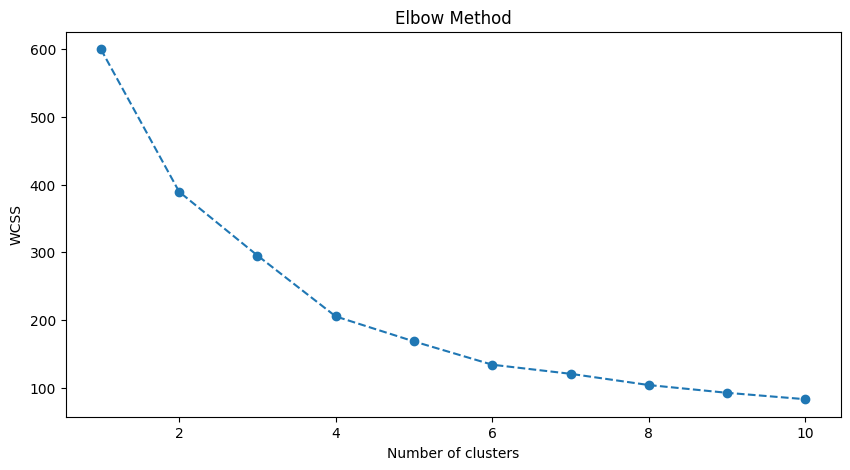

In [7]:
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [8]:
optimal_clusters = 5  # This value is usually determined from the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)


In [9]:
data['Cluster'] = clusters


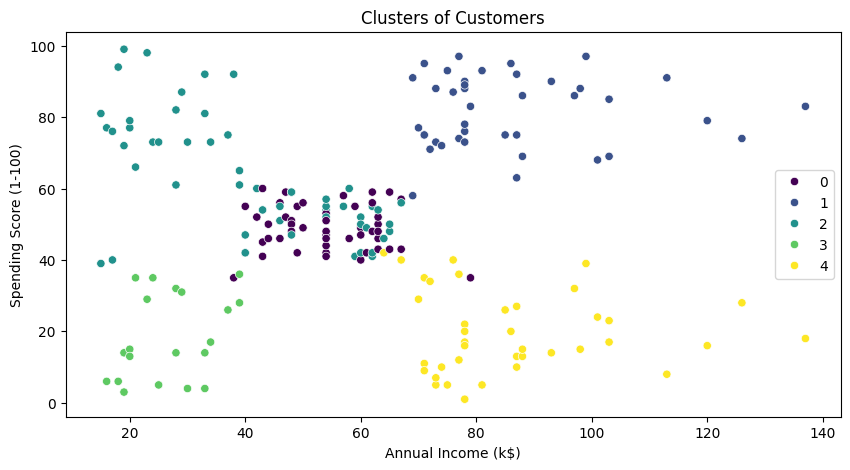

In [10]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [11]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print('Cluster Centers:')
print(cluster_centers)

Cluster Centers:
[[55.63829787 54.38297872 48.85106383]
 [32.875      86.1        81.525     ]
 [25.18518519 41.09259259 62.24074074]
 [46.25       26.75       18.35      ]
 [39.87179487 86.1025641  19.35897436]]
